In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/txt_sentoken')

['pos', 'neg']

In [0]:
from sklearn.datasets import load_files

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
reviews = load_files('/content/gdrive/My Drive/Colab Notebooks/Data_sets/txt_sentoken')

In [0]:
X,y = reviews.data,reviews.target

In [0]:
#X

In [0]:
import re
corpus = []
for i in range(0, 2000):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [0]:
import numpy as np
corpus=np.asarray(corpus)

In [0]:
corpus.shape

(2000,)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
tokenizer= Tokenizer(num_words=10000)


In [0]:
tokenizer.fit_on_texts(corpus)

In [0]:
corpus

Output hidden; open in https://colab.research.google.com to view.

In [0]:
corpus = tokenizer.texts_to_sequences(corpus)

In [0]:
corpus = pad_sequences(corpus, maxlen=200)

In [0]:
corpus

array([[  32,  221, 1731, ...,   23,  458,  606],
       [5202,    4, 2085, ..., 2281,   32,  322],
       [   8, 1007, 6318, ...,    6,    1,  194],
       ...,
       [   7,   33,  583, ...,   66,    3,   62],
       [ 331,   47,    4, ...,   61,  122,  981],
       [  35, 4543, 1857, ...,  362,    1, 8442]], dtype=int32)

In [0]:
print(corpus.shape)



(2000, 200)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(corpus,y, test_size=0.20, random_state=101)

In [0]:
X_train.shape

(1600, 200)

In [0]:
y_train.shape

(1600,)

In [0]:
from keras.layers import Dense, Embedding,LSTM,Flatten
from keras.models import Sequential


In [0]:
model = Sequential()

model.add(Embedding(10000,200,mask_zero=True))
model.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
#model.add(LSTM(16,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
lstm_20 (LSTM)               (None, None, 64)          67840     
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 2,080,289
Trainable params: 2,080,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train, y_train,epochs=15, batch_size=12, verbose=1, validation_data=(X_test1, y_test1),)

Train on 1600 samples, validate on 400 samples
Epoch 1/15
1600/1600 [==============================] - 50s 32ms/step - loss: 0.2018 - acc: 0.7206 - val_loss: 0.2000 - val_acc: 0.6725
Epoch 2/15
1600/1600 [==============================] - 51s 32ms/step - loss: 0.0894 - acc: 0.8875 - val_loss: 0.2223 - val_acc: 0.6700
Epoch 3/15
1600/1600 [==============================] - 50s 31ms/step - loss: 0.0554 - acc: 0.9369 - val_loss: 0.2273 - val_acc: 0.6875
Epoch 4/15
1600/1600 [==============================] - 50s 31ms/step - loss: 0.0279 - acc: 0.9650 - val_loss: 0.2218 - val_acc: 0.7300
Epoch 5/15
1600/1600 [==============================] - 50s 31ms/step - loss: 0.0212 - acc: 0.9750 - val_loss: 0.2432 - val_acc: 0.7025
Epoch 6/15
1600/1600 [==============================] - 50s 31ms/step - loss: 0.0137 - acc: 0.9844 - val_loss: 0.2926 - val_acc: 0.6750
Epoch 7/15
1600/1600 [==============================] - 50s 31ms/step - loss: 0.0270 - acc: 0.9669 - val_loss: 0.2357 - val_acc: 0.7075
E

In [0]:
model.save('keras_twitter.tw')

In [0]:
y_pred=model.predict_classes(X_test1)

In [0]:
val=[]
for val1 in y_pred:
  val.append(val1[0])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, val)

In [0]:
cm

array([[136,  62],
       [ 54, 148]])

In [0]:
sample = ["You are a nice person man, have a good life"]
corpus1 = tokenizer.texts_to_sequences(sample)
corpus1 = pad_sequences(corpus1, maxlen=200)

In [0]:
model.predict_classes(corpus1)

array([[1]], dtype=int32)

In [0]:
model.predict(corpus1)

array([[0.9794862]], dtype=float32)

In [0]:
consumer_key = '3Hl5Ilq4gEwW13kC5prMDI5ao'
consumer_secret = 'VS4Wc2REWuJIbnlcx3Cj90lKyMJGA9e8etBrrVsLjZdgVlK6Lb' 
access_token = '2183088190-3idIUXkbhDAxNCwXku06QKNMXiSq0DgMUY5mcTc'
access_secret ='SWyutClfD0bG6UvJwvNX6Zn0q2zO9yfS8GwHjRYbdbXzi'

In [0]:
import tweepy
from tweepy import OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['Pulwama'];
api = tweepy.API(auth,timeout=10)

In [0]:
list_tweets = []
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(100):
        list_tweets.append(status.text)

In [0]:
list_tweets[:5]

["I'm condemn for pulwama terrorism attack",
 'Post #Pulwama Terror Attack, 10,000 Troops Airlifted To Srinagar Amid Crackdown In J&amp;K😍#NoTerrorists Left behind 😎',
 '@shahfaesal @jandkgovernor Now he is DC Pulwama',
 "'Pakistan was born in and is scarred by an identity fetish. Instead of embracing freedom, we also want to measure u… https://t.co/swsISQcVCA",
 'Upper caste alleged liberals and hindutva morons have trashed the caravan article profiling caste of the dead in pu… https://t.co/5wIHfpdSut']

In [0]:
total_pos = 0
total_neg = 0
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = model.predict_classes(pad_sequences(tokenizer.texts_to_sequences([tweet]),maxlen=200))
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1
    


In [0]:
total_pos

62

In [0]:
total_neg

38

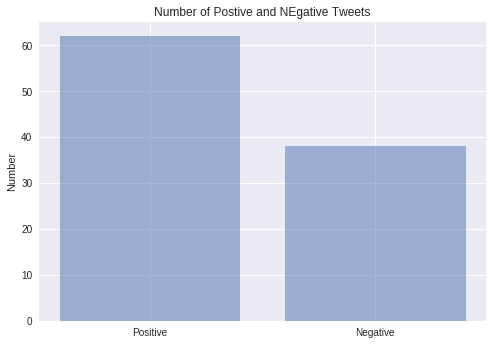

In [0]:
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()